In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [23]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

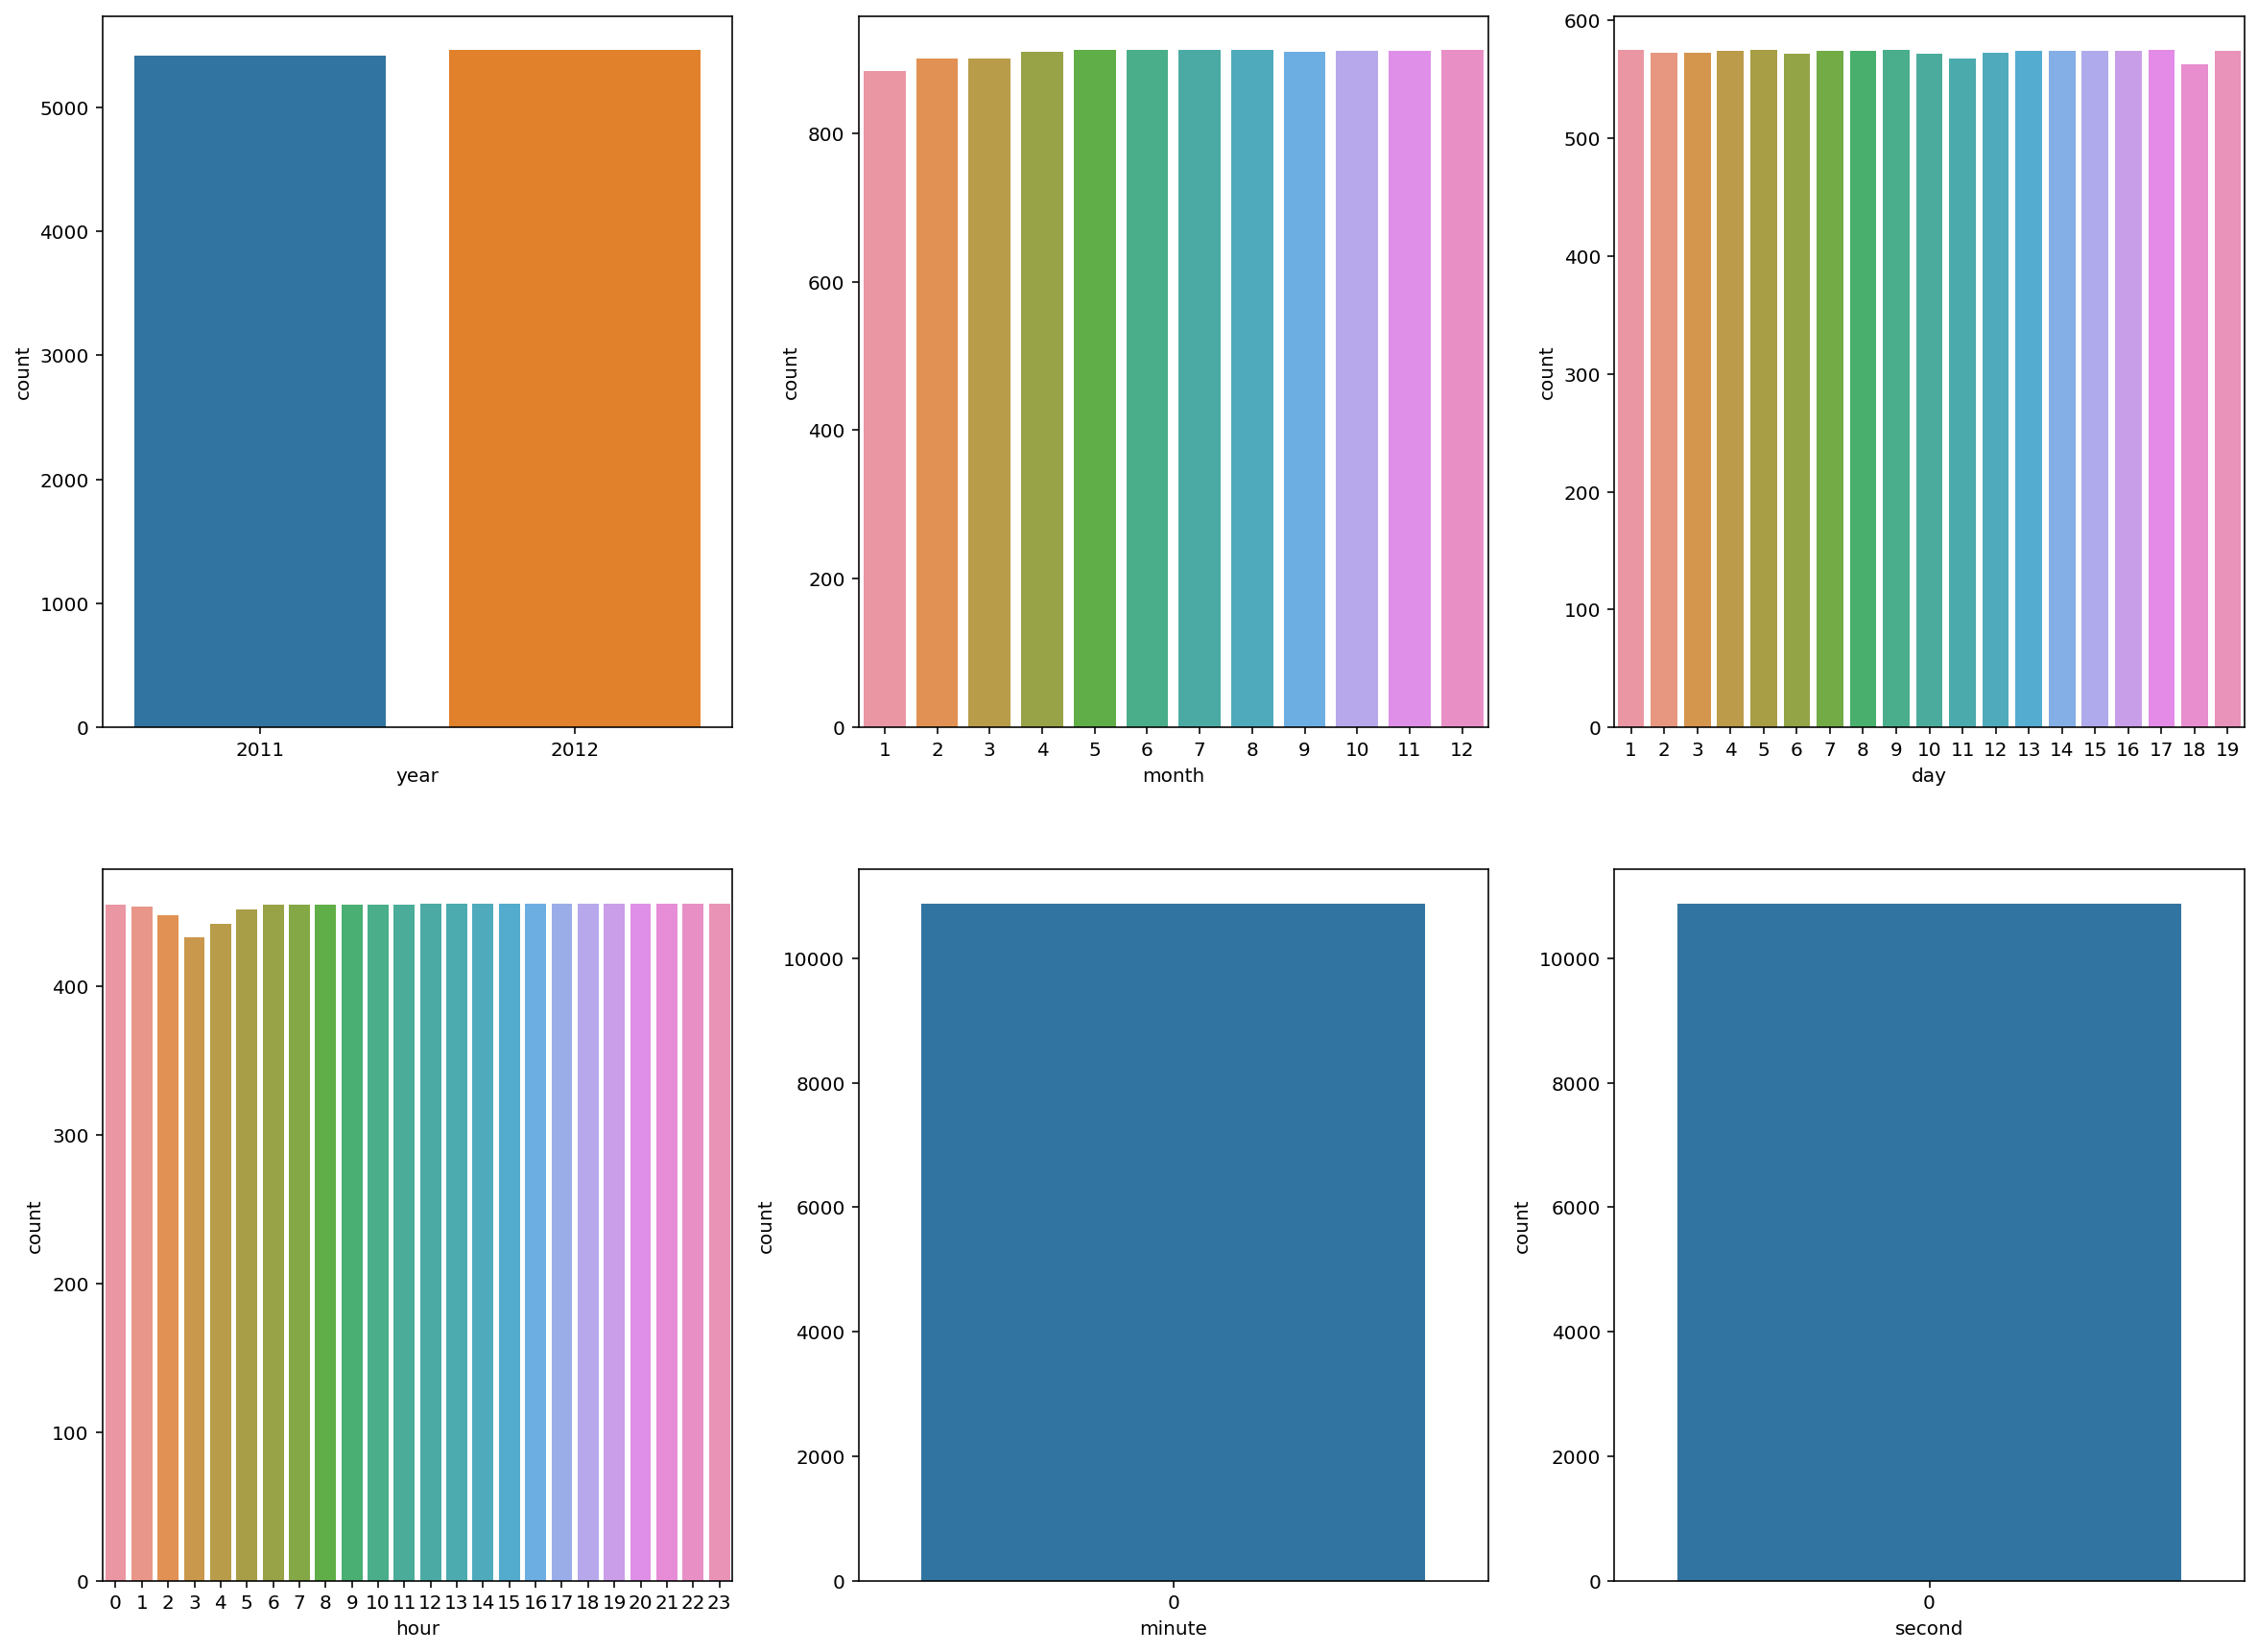

In [32]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.countplot(x='year', data=train, ax=ax1)
sns.countplot(x='month', data=train, ax=ax2)
sns.countplot(x='day', data=train, ax=ax3)
sns.countplot(x='hour', data=train, ax=ax4)
sns.countplot(x='minute', data=train, ax=ax5)
sns.countplot(x='second', data=train, ax=ax6)
plt.show()

In [36]:
X = train[['year', 'month', 'day', 'hour', 'minute', 'second', 'temp', 'atemp', 'humidity']]
y = train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
print(mse)
print(rmse)

19642.114769625594
140.1503291812959


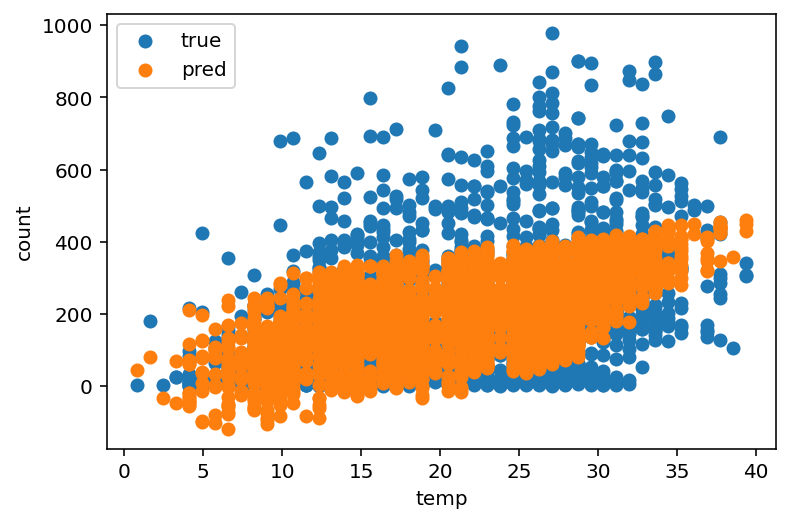

In [42]:
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], pred, label="pred")
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

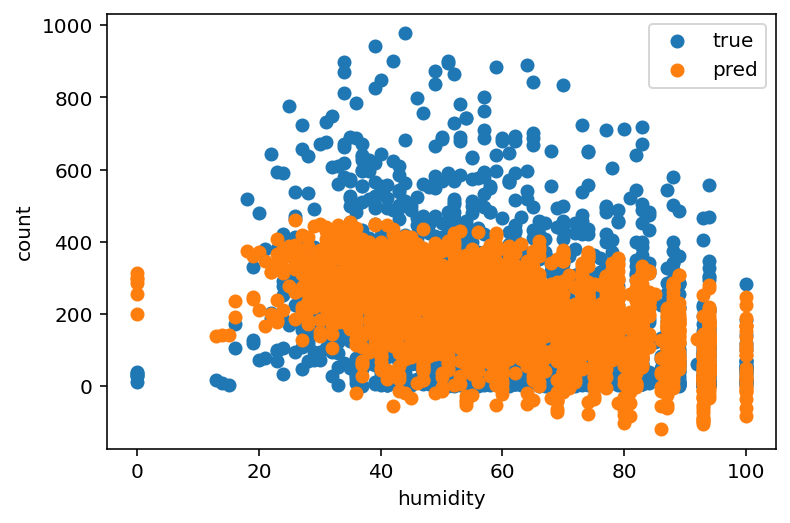

In [43]:
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], pred, label="pred")
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()